In [3]:
!pip install opencv-python matplotlib
!pip install imageio



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


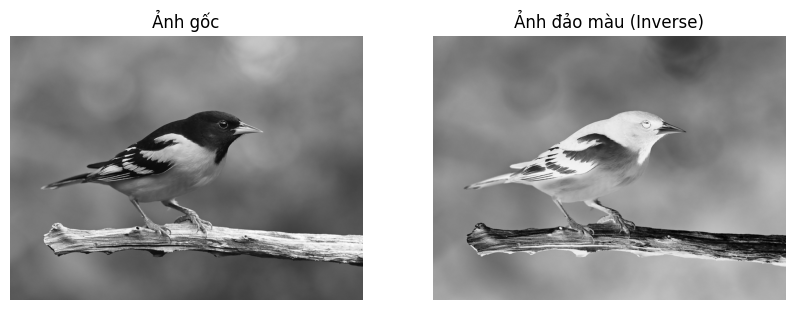

In [ ]:
#Cau1
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Mở ảnh xám
img = Image.open('bird.png').convert('L')

# Chuyển ảnh sang mảng numpy
im_1 = np.asarray(img).astype(np.uint8)

# Đảo ảnh (inversion): 255 - giá trị pixel
im_2 = 255 - im_1

# Tạo ảnh mới từ mảng đã biến đổi
new_img = Image.fromarray(im_2)

# Hiển thị ảnh gốc và ảnh đã đảo màu
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(im_1, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(im_2, cmap='gray')
plt.title("Ảnh đảo màu (Inverse)")
plt.axis('off')
plt.show()


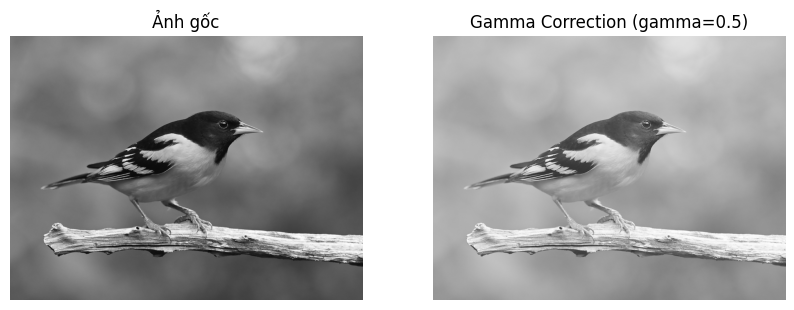

In [ ]:
#Cau2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Mở ảnh xám
img = Image.open('bird.png').convert('L')

# Chuyển ảnh sang mảng numpy
im_1 = np.asarray(img).astype(float)

# Giá trị gamma
gamma = 0.5

# Chuẩn hóa giá trị về [0, 1]
im_norm = im_1 / np.max(im_1)

# Áp dụng gamma correction
im_gamma = np.power(im_norm, gamma) * 255.0

# Chuyển sang kiểu uint8
im_result = np.clip(im_gamma, 0, 255).astype(np.uint8)

# Tạo ảnh từ mảng đã xử lý
img_gamma = Image.fromarray(im_result)

# Hiển thị ảnh gốc và ảnh đã biến đổi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(im_1, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(im_result, cmap='gray')
plt.title(f"Gamma Correction (gamma={gamma})")
plt.axis('off')
plt.show()


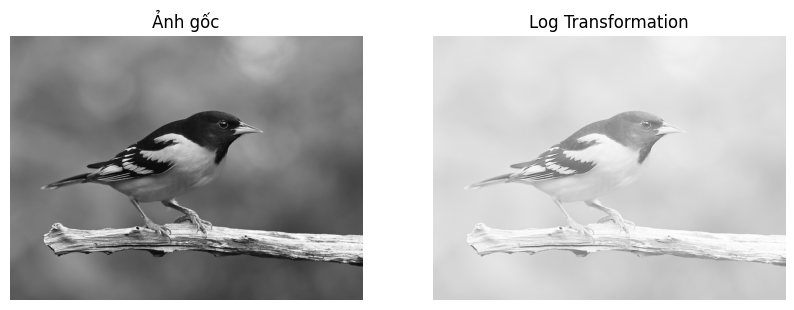

In [12]:
#Cau3
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Mở ảnh và chuyển sang grayscale
img = Image.open('bird.png').convert('L')

# Chuyển ảnh sang mảng numpy kiểu float
im_1 = np.asarray(img).astype(float)

# Lấy giá trị cực đại trong ảnh
max_val = np.max(im_1)

# Áp dụng log transformation
c = 255.0 * np.log(1 + im_1) / np.log(1 + max_val)

# Chuyển kết quả về kiểu uint8 để tạo ảnh
c1 = np.clip(c, 0, 255).astype(np.uint8)

# Tạo ảnh từ mảng log-transformed
log_img = Image.fromarray(c1)

# Hiển thị ảnh gốc và ảnh sau log transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(c1, cmap='gray')
plt.title("Log Transformation")
plt.axis('off')
plt.show()


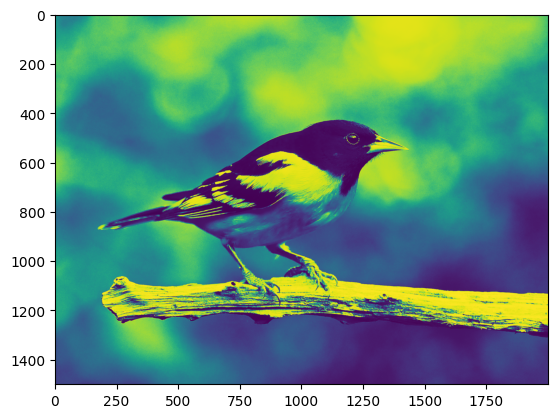

In [2]:
#Cau 4
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
im1 = np.asarray(img)
#convert 2D ndarray from 1D array
b1 = im1.flatten()
#histogram and bin are computed
hist, bins = np.histogram(im1, 256, [0, 255])
#cumulative distribution function is computed
cdf = hist.cumsum()
#places where cdf=0 is masked or ignored and
#rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)
#histogram equalization is performed
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
#the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
#cdf values are assigned in the flattened array
im2 = cdf[b1]
#im2 is 1D so we use reshape command to
#make it into 2D
im3 = np.reshape(im2, im1.shape)
#converting im3 to an image
im4 = Image.fromarray(im3)
img.show()
im4.show()
plt.imshow(im4)
plt.show()

0 255


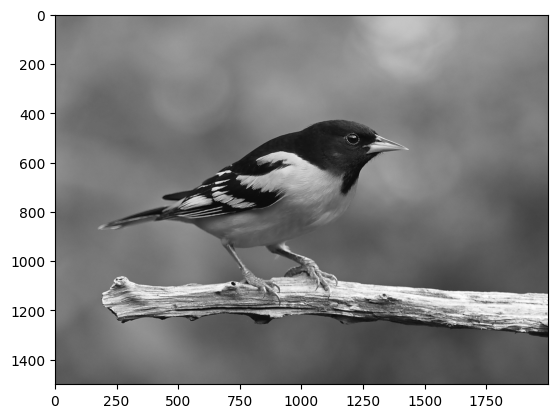

In [3]:
#Cau5
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
im1 = np.asarray(img)
# finding the maximum and minimum pixel values
b = im1.max()
a = im1.min()
print(a, b)
# converting im1 to float
c = im1.astype(float)
# contrast stretching transformation
im2 = 255 * (c - a) / (b - a)
#im2 is converted from ndarray to image
im3 = Image.fromarray(im2)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

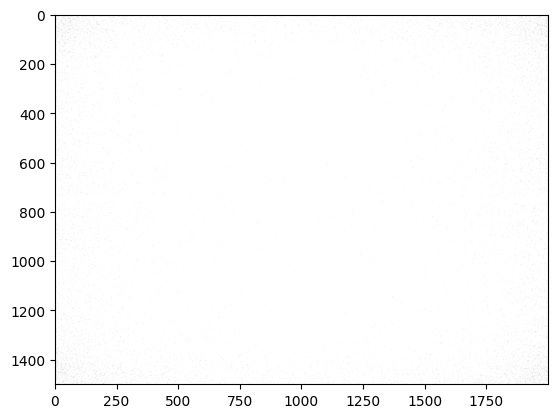

In [ ]:
#Cau6.1
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
im1 = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
#im2 is converted from ndarray to image
im3 = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

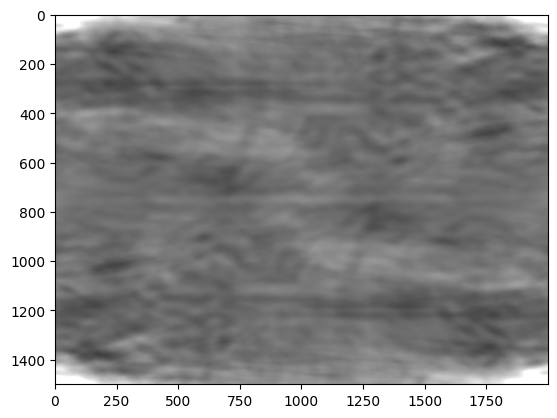

In [5]:
#Cau6.2
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
im1 = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
#initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
#H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0 #cut-off radius
t1 = 1 #the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# defining the convolution function for BLPF
for i in range(M):
    for j in range(N):
        r1 = (i - center1)**2 + (j - center2)**2
        # euclidean distance from origin is computed
        r = math.sqrt(r1)
        # using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**t2)
#H is converted from ndarray to image
H = H.astype(float)
H = Image.fromarray(H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))
#e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

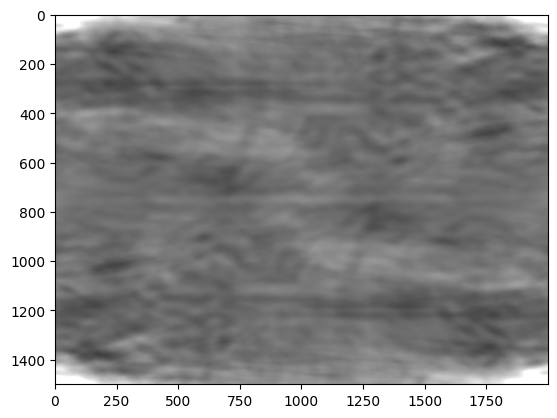

In [6]:
#Cau6.3
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
im1 = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
#initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
#H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0 #cut-off radius
t1 = 1 #the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# defining the convolution function for BLPF
for i in range(M):
    for j in range(N):
        r1 = (i - center1)**2 + (j - center2)**2
        # euclidean distance from origin is computed
        r = math.sqrt(r1)
        # using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**t2)
#H is converted from ndarray to image
H = H.astype(float)
H = Image.fromarray(H)
# performing the convolution
con = d * H
# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))
#e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()